In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
movie_frame = pd.read_csv('movie_frame.csv')
#a glimpse of how the dataframe looks like:
movie_frame.tail()

,title,year,director,actors,critic_rating,user_rating,rating_diff,rating_diff_abs,keywords,outcome
1003,Shadow of a Doubt,1943,Alfred Hitchcock,"Teresa Wright,Joseph Cotten,Macdonald Carey,He...",94.0,79.0,-15.0,15.0,"murderer,serial killer,amateur detective,psych...",True
1004,Spindesys,1996,Scott Hicks,"Geoffrey Rush,Justin Braine,Sonia Todd,Chris H...",87.0,77.0,-10.0,10.0,"piano,pianist,australia,abuse,concert,concert ...",False
1005,Take This Waltz,2011,Sarah Polley,"Michelle Williams,Seth Rogen,Luke Kirby,Sarah ...",68.0,66.0,-2.0,2.0,"actress breaking typecast,husband wife relatio...",True
1006,Yosemite,2015,Gabrielle Demeestere,"James Franco,Everett Meckler,Troy Tinnirello,C...",59.0,48.0,-11.0,11.0,"f rated,grazed by bullet,grazed by a bullet,bu...",False
1007,The Sisters Brothers,2018,Jacques Audiard,"John C. Reilly,Joaquin Phoenix,Jake Gyllenhaal...",78.0,72.0,-6.0,6.0,"thieves on the run,shootout,brother brother re...",True


# I Part - some EDA:

In [143]:
#extracting the numeric data from the dataframe
num_data = movie_frame[['critic_rating', 'user_rating', 'rating_diff', 'rating_diff_abs','outcome']]

from the violin plots below it is visible that preferred movies have a tendency to have higher both critic rating and user rating. 
in addition, critic rating has lower variability for positive outcome movies

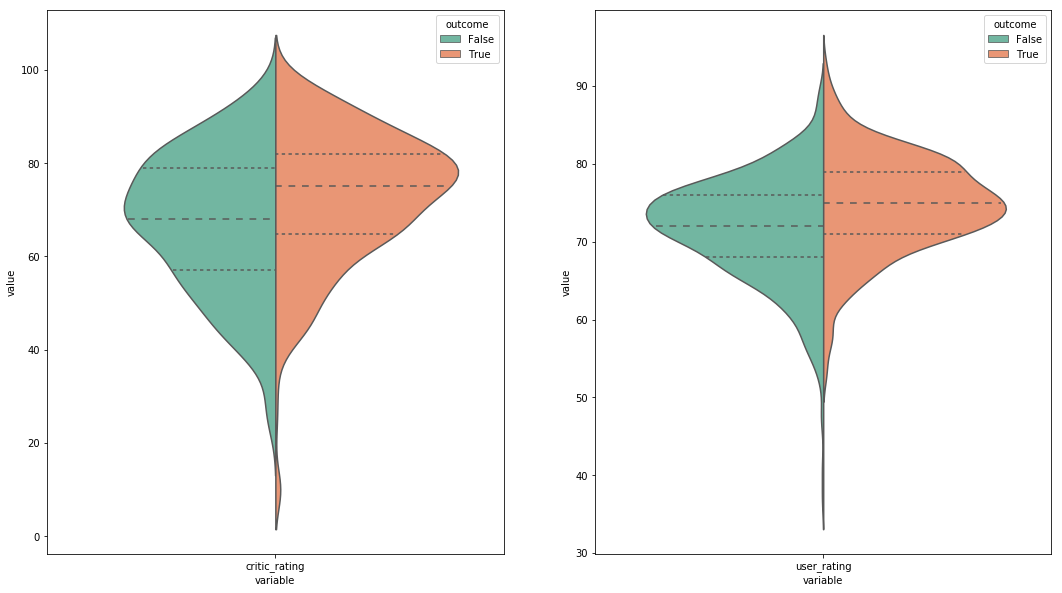

In [57]:
vp1 = pd.melt(num_data, id_vars='outcome', value_vars=['critic_rating'])
vp2 = pd.melt(num_data, id_vars='outcome', value_vars=['user_rating'])
fig, ax = plt.subplots(1,2, figsize=(18,10))
sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp1, ax=ax[0])
sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp2, ax=ax[1])


rating difference between true outcome movies and false outcome movies also differes a little bit.
first plot indicates that even though the positive outcome movies have move skewed to the left rating_difference and the medians are rather close to one another but there's still a tendency that positive sentiment movies have higher critic rating than user compared to the negative sentiment movies because the mode is a negative number

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


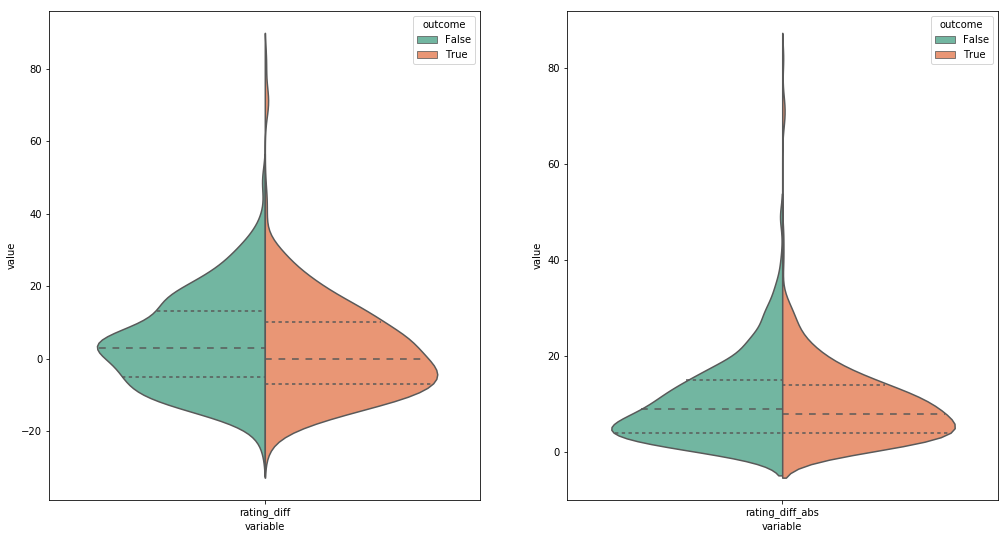

In [59]:
vp3 = pd.melt(num_data, id_vars='outcome', value_vars=['rating_diff'])
vp4 = pd.melt(num_data, id_vars='outcome', value_vars=['rating_diff_abs'])

fig, ax = plt.subplots(1,2, figsize=(17,9))

sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp3, ax=ax[0])
sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp4, ax=ax[1])
fig.show()


Below are graphs for visualisizngthe relationships between the numeric data and whether there is any separation between positive sentiment and negative sentiment samples

The scatters are quite overlapping but there's barely visible red dots being clustered(meaning positive outcome movies) as opposed to the blue ones in second picture where high critic rating movies have lower user ratings. this information would correspond with the violin plot above

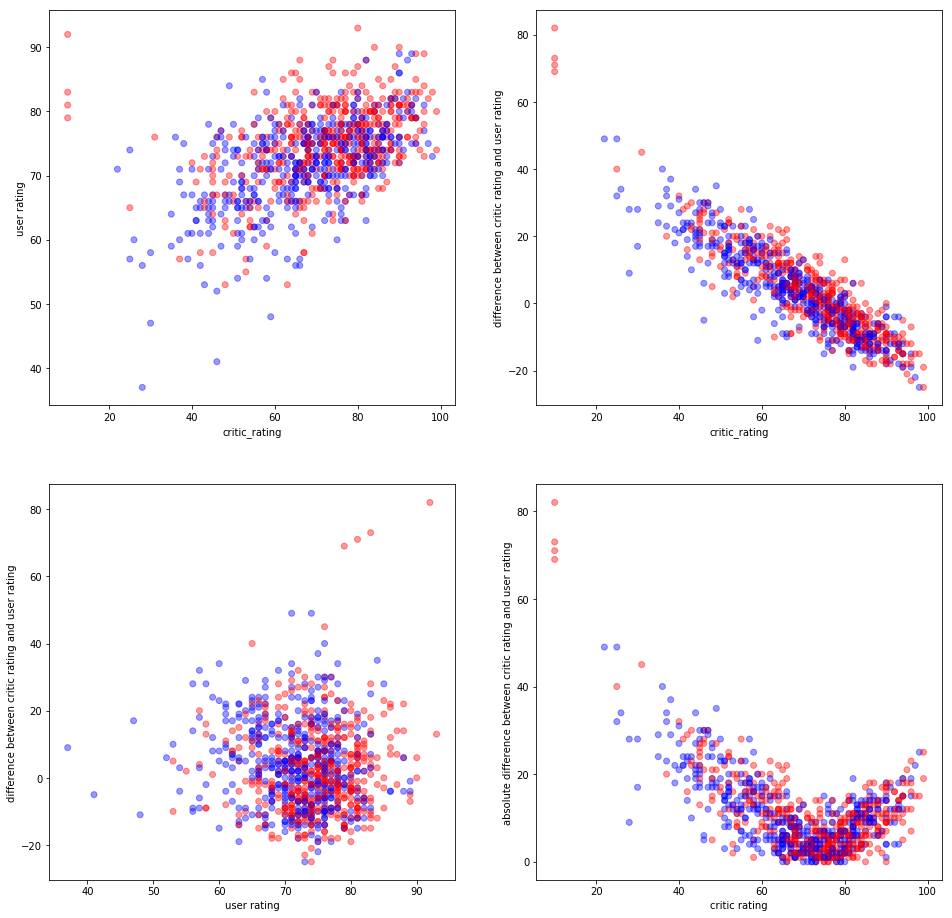

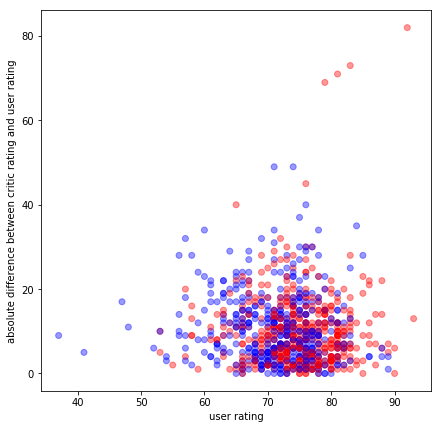

In [154]:
fig, ax = plt.subplots(2,2, figsize=(16,16)) 
colors1 = {True:'red', False:'blue'}

ax[0,0].scatter(num_data['critic_rating'], num_data['user_rating'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[0,0].set_xlabel('critic_rating')
ax[0,0].set_ylabel('user rating')


ax[0,1].scatter(num_data['critic_rating'], num_data['rating_diff'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[0,1].set_xlabel('critic_rating')
ax[0,1].set_ylabel('difference between critic rating and user rating')

ax[1,0].scatter(num_data['user_rating'], num_data['rating_diff'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[1,0].set_xlabel('user rating')
ax[1,0].set_ylabel('difference between critic rating and user rating')

ax[1,1].scatter(num_data['critic_rating'], num_data['rating_diff_abs'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[1,1].set_xlabel('critic rating')
ax[1,1].set_ylabel('absolute difference between critic rating and user rating')


fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(num_data['user_rating'], num_data['rating_diff_abs'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
plt.xlabel('user rating')
plt.ylabel('absolute difference between critic rating and user rating')
plt.show()



Trying out the principal component analysis and visualising if there is some division between the numeric data with true outcome versus false outcome.
As the picture below shows there is no clearly perceptible clustering for positive and negative sentiment

In [180]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, Imputer

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(-2, 3)

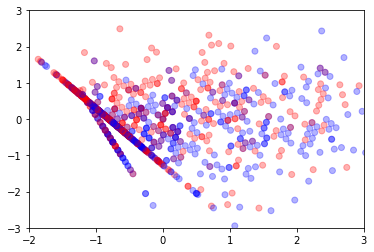

In [194]:
# Separating out the features and storing them as arrays
x_num = num_data[['critic_rating', 'user_rating', 'rating_diff', 'rating_diff_abs']].values

# Standardizing the features and filling the null values
imp = Imputer(strategy="most_frequent", axis=0) 
rescaled_x = RobustScaler().fit_transform(imp.fit_transform(x_num))

pca = PCA(n_components=2)
pca_x = pca.fit_transform(rescaled_x)
pca_df = pd.DataFrame(pca_x)

colors1 = {True:'red', False:'blue'}
plt.scatter(pca_df[[0]], pca_df[[1]], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.3)
plt.ylim(-3,3)
plt.xlim(-2,3)
    

prepareing to visualise actors and directors by the two sentiments

In [275]:
outcomes = movie_frame['outcome'].values
#since every movie has a list of actors, I need to separate each actor from the list:
actors = [i.split(',') for i in movie_frame['actors'].values] 

actors_values = [] #the list will be filled with an actor ant their outcome for each movie they are in
for n in range(len(actors)):
    a_v = [actors[n], outcomes[n]] #re-joining the actors with their outcome
    for i in range(len(a_v[0])):
        actors_values.append([a_v[0][i],a_v[1]])
actor_frame = pd.DataFrame(actors_values, columns=['actor', 'outcome']) #actor and outcome dataframe

#adding count column for each actor for the number of times they appeared in the the movies dataset
actor_frame['count'] = actor_frame.groupby(['actor'])['outcome'].transform('count') 
#will be visualising the actors that appeared in 10 and more movies
actor_frame = actor_frame.loc[actor_frame['count']>9]

In [301]:
import pixiedust 
pixiedust.display(actor_frame)

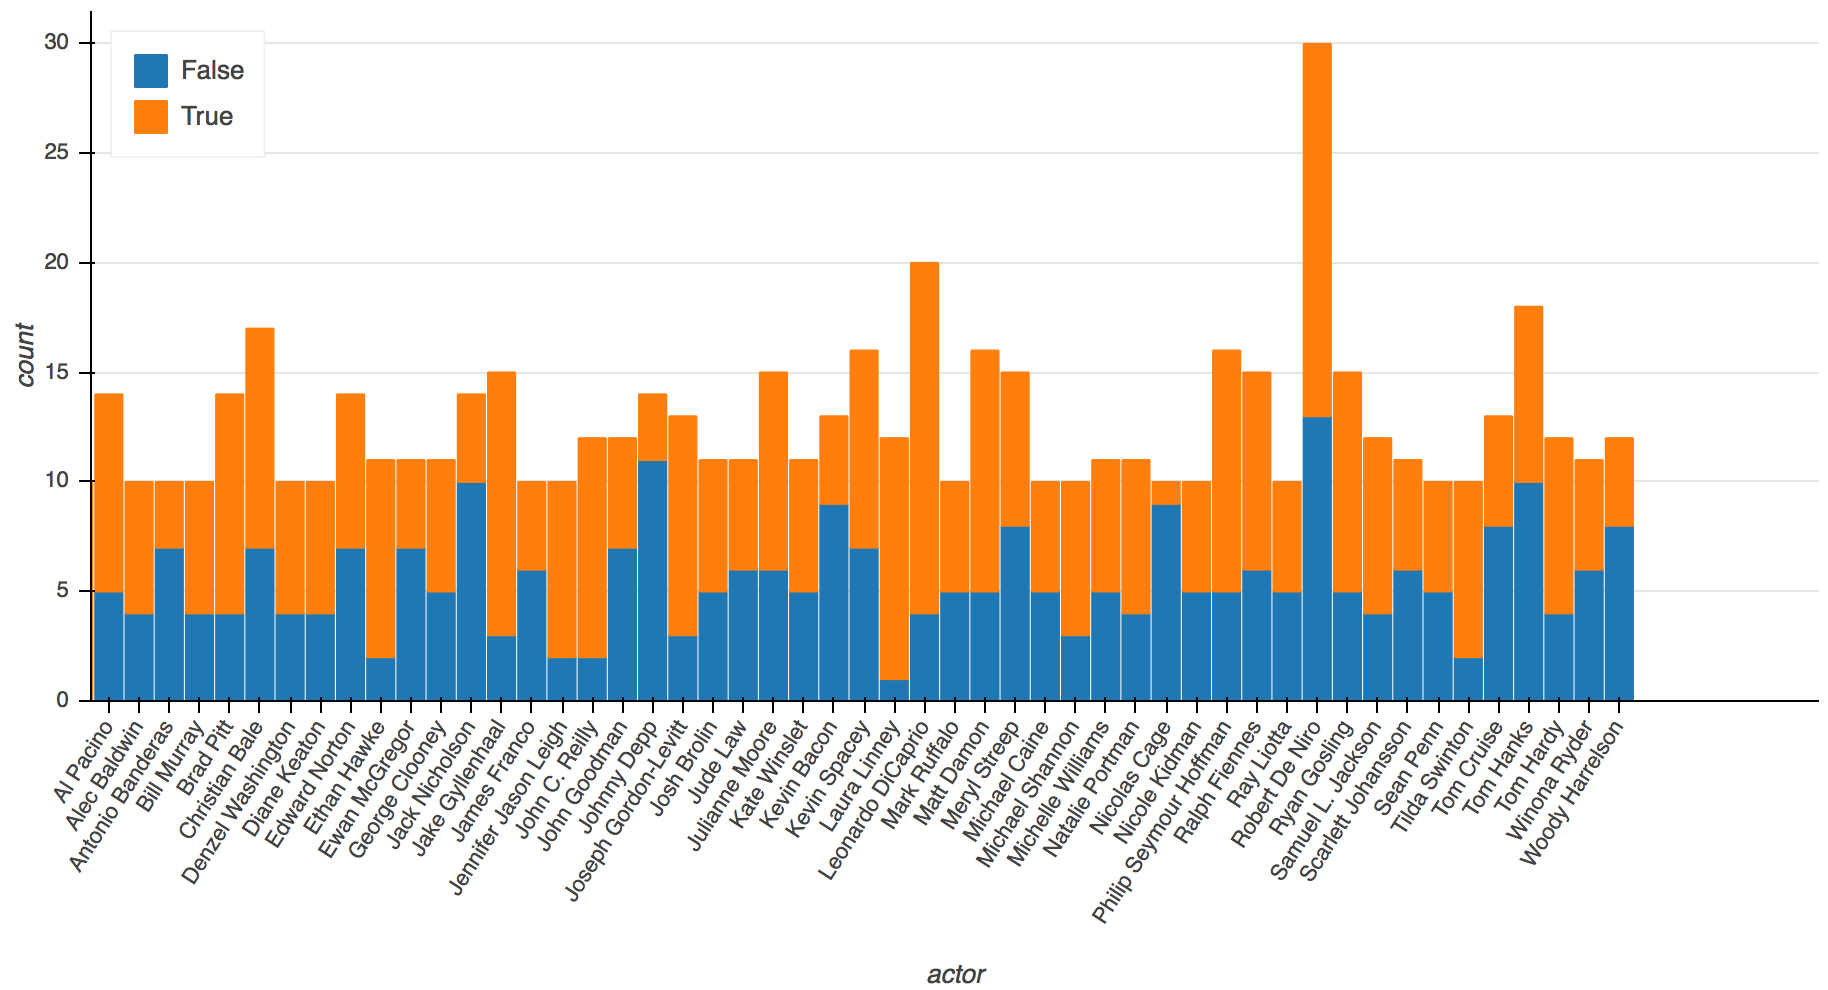

In [284]:
#image of the graph that was supposed to be visible above
#Actors that appeared in 10 or more movies and the sentiment they carry based on the movies they were in

In [311]:
director_frame = movie_frame[['director', 'outcome']]
director_frame['count'] = director_frame.groupby(['director'])['outcome'].transform('count')
 
pixiedust.display(director_frame)

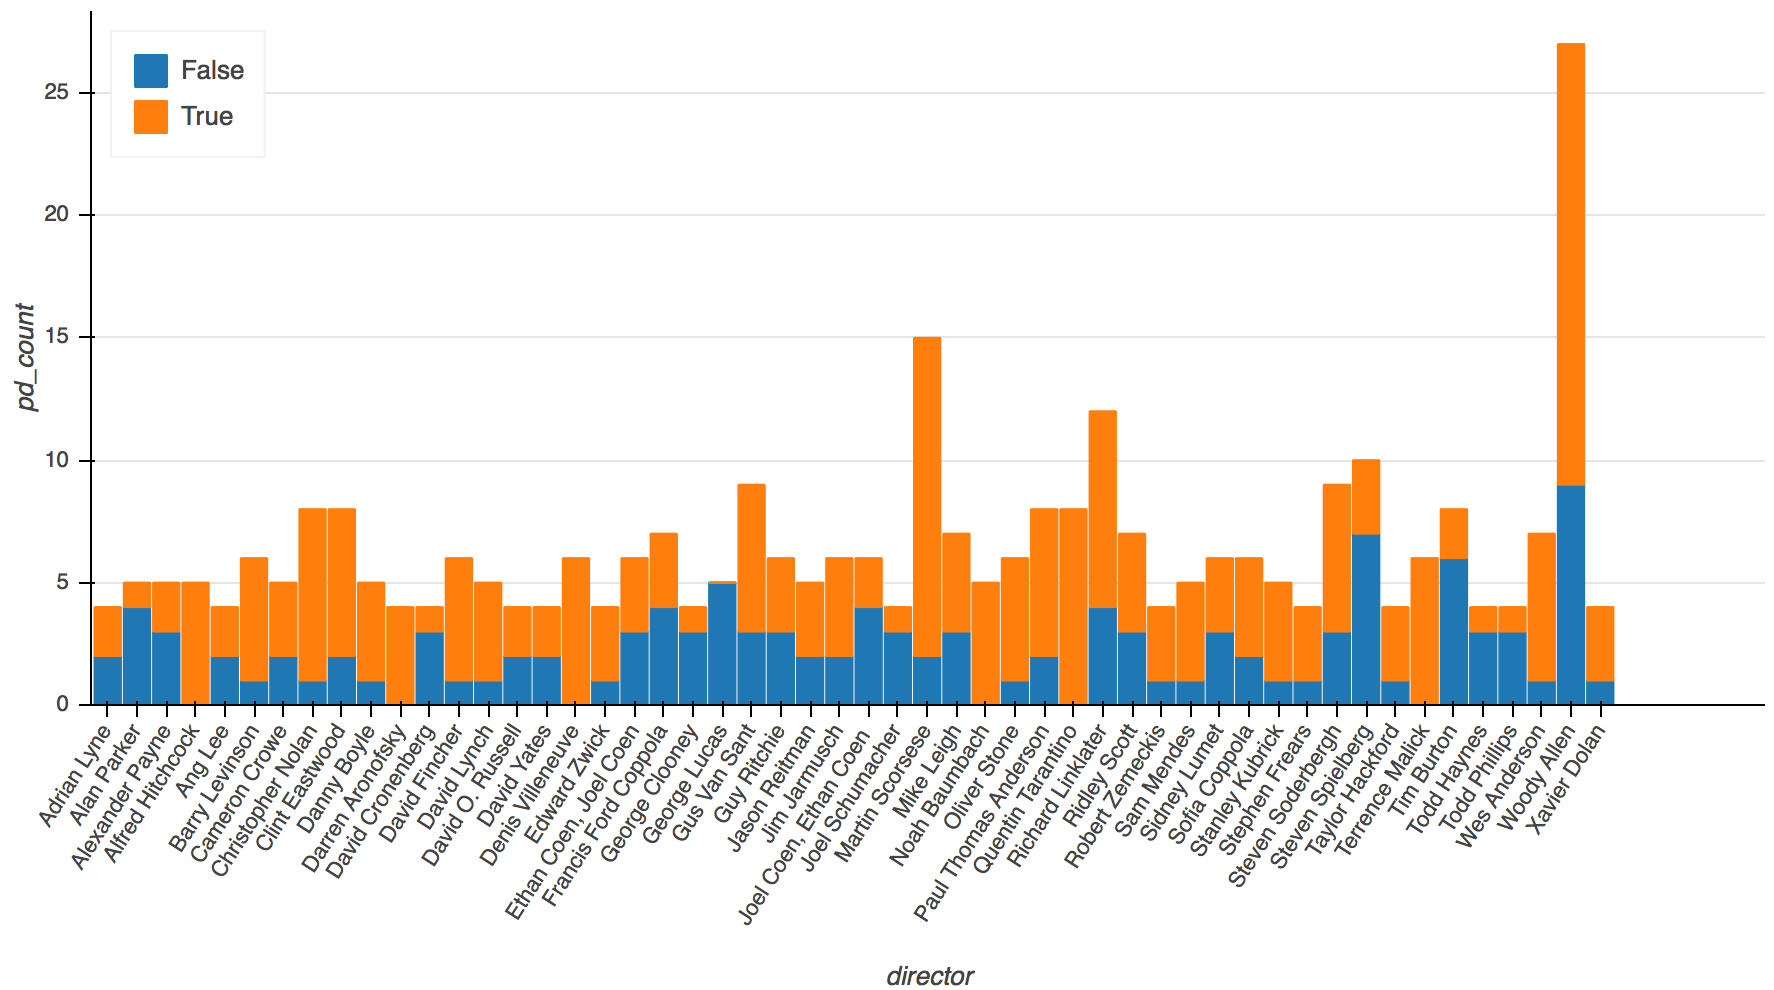

In [310]:
#image of the graph above
#Directors that appeared in 4 or more movies and the sentiment they carry based on the movies they directed
#the graph shows the strongest positive sentiment to Quentin Tarnatino, Dennis Villenueve, Martin Scorsese, 
# Noah Baumach, Richard Linklater, Terrence Malick, Woody Allen

keywords visualisation:

In [312]:
#extract the list of keywords and outcome related to them
keywords = movie_frame['keywords'].values
outcome = movie_frame['outcome'].astype(int)

#splitting the keywords to separate strings, making all words lower-case and eliminating those samples that don't have keywords
keywords_lower = []
outcome_l = []
for i,e in zip(keywords,outcome):
    t0 = i.split(',')
    t = [w.lower() for w in t0] 
    if len(t)>1:
        keywords_lower.append(t)
        outcome_l.append(e)
        

Trying to figure out if recurrent words from the keywords list are somewhat exclusive for either True or False outcome of a movie
Black background graph will be for False outcome movies and white for True 
However this didn't help much, both positive and negative sentiment movies have recurring theme of death and relationships.
At this point it was decided to take a look into movie reviews. Therefore new web scraping started taking place



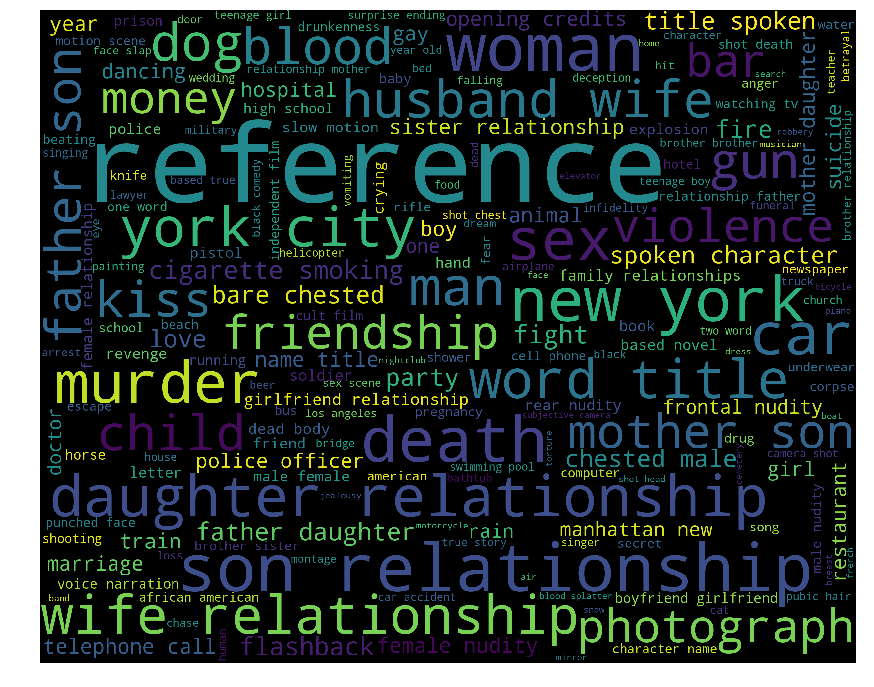

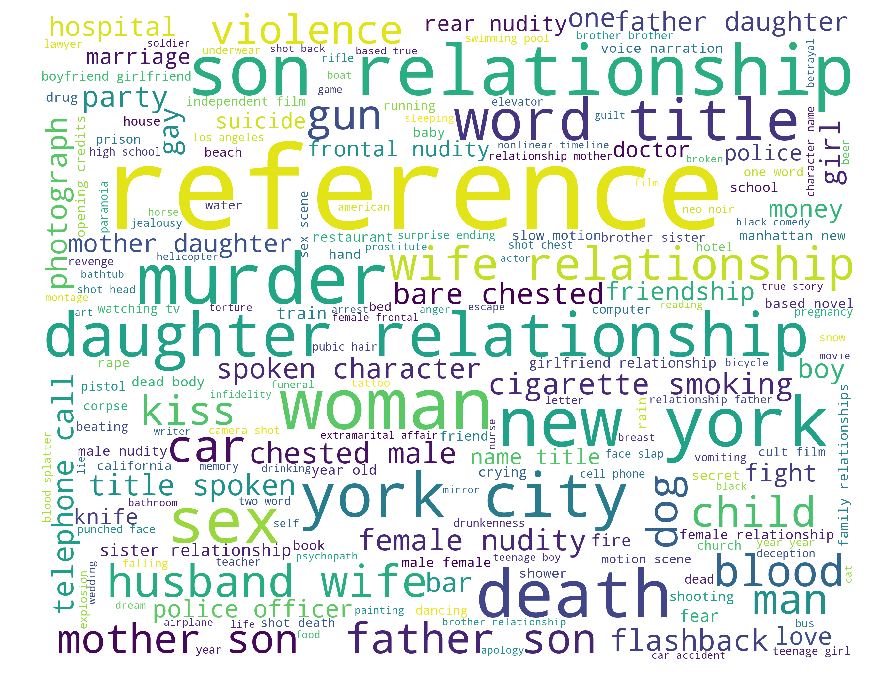

In [274]:
from wordcloud import WordCloud

def wordcloud_draw(y, x, out=0, color = 'black'):
    indexes = np.where(np.array(y)==out)[0].tolist() #get the indexes for either true or false outcome
    words = [x[i] for i in indexes] #select the keywords related with either true or false outcome
    whole = [' '.join(i) for i in words]
    wordcloud = WordCloud(background_color=color,width=2500,height=2000).generate(' '.join(whole))
    plt.figure(1,figsize=(20, 12)) 
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(outcome_l, keywords_lower, out=0, color = 'black')
wordcloud_draw(outcome_l, keywords_lower, out=1, color = 'white')


# II Part - critic reviews

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
set(stopwords.words('english'))


In [318]:
#opening the gathered critic reviews:
review_and_outcome = pd.read_csv('review_and_outcome.csv').values


In [14]:
#tokenizing the review texts:

text = [i[0] for i in review_and_outcome] 
outcome = [i[1] for i in review_and_outcome]
stop_words = set(stopwords.words('english'))

tokenized_text = []
for i in text:
    t1 = word_tokenize(i) #separating all the words into separate strings
    t2 = [w.lower() for w in t1] #converting to lower-case
    t3 = [w for w in t2 if w.isalpha()] #remove all elements that are not alpahbetical
    t0 = [w for w in t3 if not w in stop_words] #eliminating stop-words
    tokenized_text.append(t0)
    
#getting rid of the the texts that have 100 words and less
X=[]
Y=[]
for i,e in zip(tokenized_text,outcome):
    if len(i)>100:
        X.append(i)
        Y.append(e)

In [323]:
from collections import Counter
Counter(Y)

Counter({False: 1057, True: 1144})

As per information above sample now consists of 2.2K reviews: 1144 categorized as True and 1057 as False

In [324]:
max_len = max([len(i) for i in X])
min_len = min([len(i) for i in X])
mean_x = np.mean([len(i) for i in X])
std_x = np.std([len(i) for i in X])
total_x = sum([len(i) for i in X]) #total word count/non-unique

max_len, min_len, mean_x, std_x, total_x 

(5981, 101, 492.1104043616538, 246.5309851861547, 1083135)

longest review consists of almost 6K words, shortest - 101 words
on average review has 492 words with std of 246
total word count for all reviews combined is over 1M)

In [25]:
import gensim

model=gensim.models.Word2Vec(sentences=X, size=100, window=7, min_count=10) 
model.train(X, total_examples=len(X), epochs=2) 
unique_words=list(model.wv.vocab) 
len(unique_words)

12770


Above is vectorizing unique words so every meaning has it's own dimentionality
Size of each vector is 100 digits long
Only words that appear in the whole text corpus 10 or more times will be vectorized and put up in the vectorized dictionary
There are 12770 unique words in the whole text corpus that appear 10 or more times. Remember that total word count is over 1M

In [ ]:
Below it's a quick check if

In [27]:
model.wv.most_similar('man'), model.wv.most_similar('profound'), model.wv.most_similar('politics')

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


([('woman', 0.8239573836326599),
  ('boy', 0.6949129700660706),
  ('person', 0.6590011119842529),
  ('soul', 0.645129919052124),
  ('girl', 0.6423314809799194),
  ('kid', 0.6041820645332336),
  ('name', 0.6026101112365723),
  ('victim', 0.6024134159088135),
  ('child', 0.5958261489868164),
  ('hero', 0.595077633857727)],
 [('underlying', 0.9650431871414185),
  ('intellectual', 0.9605517387390137),
  ('confronting', 0.9573075771331787),
  ('truths', 0.9569254517555237),
  ('specific', 0.9541032314300537),
  ('uplifting', 0.9517643451690674),
  ('explore', 0.9498921632766724),
  ('observation', 0.9488849639892578),
  ('philosophical', 0.9445406794548035),
  ('essential', 0.9426624774932861)],
 [('sin', 0.915941059589386),
  ('implications', 0.9051206111907959),
  ('crimes', 0.9015991687774658),
  ('racism', 0.887448787689209),
  ('greed', 0.8864399194717407),
  ('legitimate', 0.885558009147644),
  ('meditation', 0.8853869438171387),
  ('fundamentally', 0.8843704462051392),
  ('theory', 0

In [316]:
model.wv.most_similar('woman'),model.wv.most_similar('think'), model.wv.most_similar('profound'), model.wv.most_similar('politics')
#checking what words have similar vectorization to relationship, woman, politics or profound

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


([('girl', 0.6524187326431274),
  ('boy', 0.6351219415664673),
  ('man', 0.610416054725647),
  ('waitress', 0.5972503423690796),
  ('lady', 0.5863891839981079),
  ('teenager', 0.5826882123947144),
  ('child', 0.579138457775116),
  ('vera', 0.5745306015014648),
  ('nurse', 0.5706342458724976),
  ('person', 0.568467378616333)],
 [('say', 0.7306560277938843),
  ('anyway', 0.7224564552307129),
  ('guess', 0.7057949304580688),
  ('ask', 0.6900709867477417),
  ('thinking', 0.6885706186294556),
  ('anybody', 0.6762778759002686),
  ('said', 0.6698130369186401),
  ('thought', 0.6693036556243896),
  ('know', 0.6610050201416016),
  ('believe', 0.6609405279159546)],
 [('underlying', 0.890788733959198),
  ('truthful', 0.8469385504722595),
  ('rewarding', 0.8319370150566101),
  ('exploration', 0.8302242755889893),
  ('confronting', 0.8238725662231445),
  ('intellectual', 0.8154534697532654),
  ('undercurrent', 0.8094648122787476),
  ('perception', 0.8082907199859619),
  ('profoundly', 0.806296288967

In [28]:
#saving the the word-vectors:
filename = 'gensim_word2vec.csv'
model.wv.save_word2vec_format(filename, binary=False)

In [29]:
#creating a dictionary of words and their vectors
def word_and_vec(vectors_file):
    embeddings = {}
    f = open(vectors_file)
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings[word] = vector
    f.close()
    return embeddings

word_embeddings = word_and_vec('gensim_word2vec.csv')



In [30]:
#vectorize the sample texts:

#to standartize the texts they will all be made into 200x100 matrixes, i.e. texts that have less than 200words after vectorization(that means that some words are cut instantlhy because they don't have a vector to represent them) will be padded extended with zeros and longer texts will be cut. 100 stands for the vector length
vectorized_corpora=np.zeros((len(X), 200, 100)) 

for review,i in zip(X,range(len(X))):
    vectorized_reveiew = np.array([word_embeddings[word] for word in review if word in unique_words]) 
    if len(vectorized_reveiew)<200:
        vectorized_reveiew.resize((200,100), refcheck=False)
        vectorized_corpora[i]=np.array(vectorized_reveiew)
    else:
        vectorized_corpora[i]=vectorized_reveiew[:200]

In [ ]:
vec_words_true = i
PCA(n_components=5).fit(X_scaled)

In [33]:

word_vectors_true = []
word_vectors_false = []

for i,e in zip(vectorized_corpora,Y):
    for word in i:
        if all(np.array(word)!=0):
            if e==True:
                word_vectors_true.append(word)
            elif e==False:
                word_vectors_false.append(word)

len(word_vectors_true), len(word_vectors_false)            

#lists include 227258 word_vectors that were in reviews marked as True and 209456 word_vectors that were in reviews marked False


(227231, 209438)

In [136]:
from sklearn.manifold import TSNE

tsne= TSNE(n_components=2, perplexity=40, n_iter=500)

true_sample = random.sample(word_vectors_true, 20000)
tsne_results_true = tsne.fit_transform(true_sample)
false_sample = random.sample(word_vectors_false, 20000)
tsne_results_false = tsne.fit_transform(false_sample)

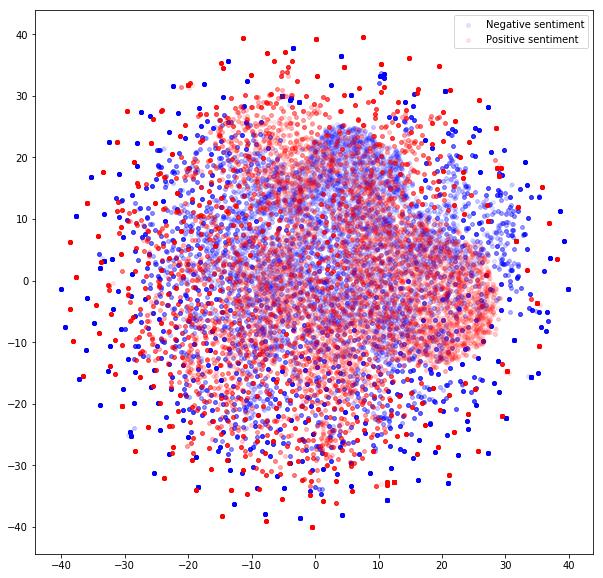

In [137]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
false=ax1.scatter([i[0] for i in tsne_results_true], [i[1] for i in tsne_results_true], s=15, c='b', marker="o", label='false', alpha=0.1)
true=ax1.scatter([i[0] for i in tsne_results_false], [i[1] for i in tsne_results_false], s=15, c='r', marker="o", label='true', alpha=0.1)
ax1.legend((false,true), ('Negative sentiment', 'Positive sentiment'))
plt.show()

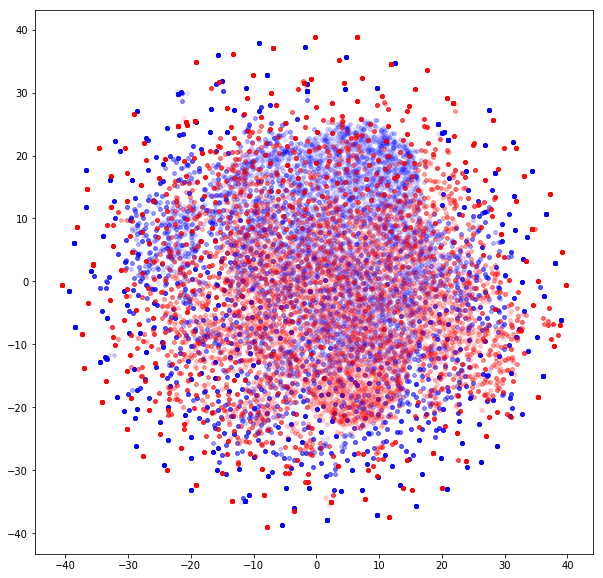

In [107]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter([i[0] for i in tsne_results_true], [i[1] for i in tsne_results_true], s=15, c='b', marker="o", label='false', alpha=0.1)
ax1.scatter([i[0] for i in tsne_results_false], [i[1] for i in tsne_results_false], s=15, c='r', marker="o", label='true', alpha=0.1)
plt.show()

# Negative sentiment text words are in BLUE
# Positice sentiment text words are in RED

In [ ]:
from sklearn.decomposition import PCA

true_sample = random.sample(word_vectors_true, 20000)
pca_true = PCA(n_components=30).fit_transform(true_sample)
false_sample = random.sample(word_vectors_false, 20000)
pca_false = PCA(n_components=30).fit_transform(false_sample)

tsne= TSNE(n_components=2, perplexity=40, n_iter=500)
tsne_results_true = tsne.fit_transform(pca_true)
tsne_results_false = tsne.fit_transform(pca_false)

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
false = ax1.scatter([i[0] for i in tsne_results_true], [i[1] for i in tsne_results_true], s=15, c='b', marker="o", label='false', alpha=0.1)
true = ax1.scatter([i[0] for i in tsne_results_false], [i[1] for i in tsne_results_false], s=15, c='r', marker="o", label='true', alpha=0.1)
ax1.legend((false,true), ('Negative sentiment', 'Positive sentiment'))
plt.show()

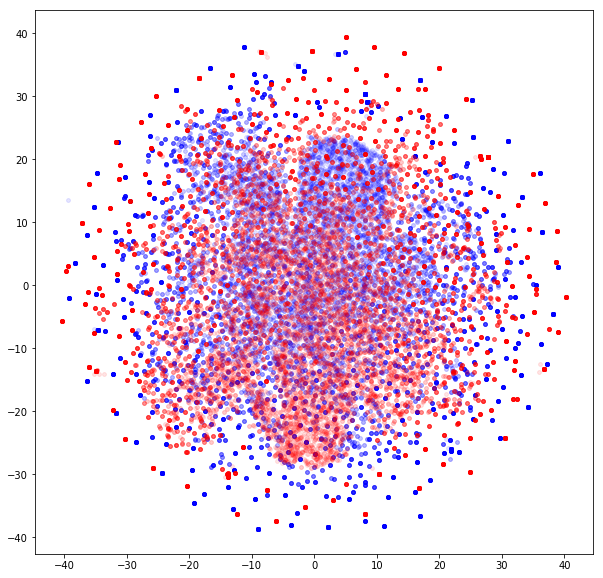

In [117]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
false = ax1.scatter([i[0] for i in tsne_results_true], [i[1] for i in tsne_results_true], s=15, c='b', marker="o", label='false', alpha=0.1)
true = ax1.scatter([i[0] for i in tsne_results_false], [i[1] for i in tsne_results_false], s=15, c='r', marker="o", label='true', alpha=0.1)
ax1.legend((false,true), ('Negative sentiment', 'Positive sentiment'))
plt.show()

In [306]:
import pixiedust
pixiedust.display(movie_frame)